In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
# datasource: http://thinknook.com/wp-content/uploads/2012/09/Sentiment-Analysis-Dataset.zip

In [4]:
df = pd.read_csv("emotion-text-dataset/Sentiment Analysis Dataset.csv", error_bad_lines=False)
df

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_71363/1905294640.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("emotion-text-dataset/Sentiment Analysis Dataset.csv", error_bad_lines=False)
Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [5]:
# # remove neutral sentiment
# df = df[df["Sentiment"] != 0]

# # convert negative sentiment to 0
# df["category"] = df["category"].replace(-1, 0)

In [6]:
df["Sentiment"].value_counts()

1    790177
0    788435
Name: Sentiment, dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [8]:
df["Sentiment"].value_counts()

1    790177
0    788435
Name: Sentiment, dtype: int64

In [9]:
df[df["Sentiment"] == 0].sample()["SentimentText"].iloc[0]

'@kraftykoala I think I might be  Or it might just be stress, I have a gland up and ache.'

In [10]:
df[df["Sentiment"] == 1].sample()["SentimentText"].iloc[0]

'.@lownleeeynjul @MissxMarisa what do you think? the next photo contest should be Scenie poses?? '

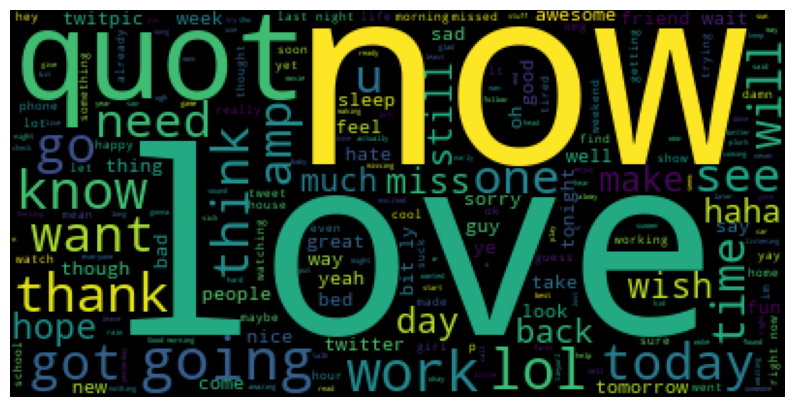

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


all_tweets = ' '.join(df['SentimentText'])

# Generate WordCloud
wordcloud = WordCloud().generate(all_tweets)

# Plot WordCloud                    
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
df.drop(['ItemID', 'SentimentSource'], axis=1, inplace=True)

In [13]:
df

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!
1578608,1,"Zzzzzzz, sleep well people"
1578609,0,ZzzZzZzzzZ... wait no I have homework.
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


Doing text cleaning on our own

In [14]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
detokenizer = TreebankWordDetokenizer()

In [15]:
def clean_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    # remove stopwords
    text = [token for token in text if token not in stop_words]
    # lemmatizer
    text = [lemmatizer.lemmatize(token) for token in text]

    # return detokenizer.detokenize(text).strip()
    return text

In [16]:
df["Clean_Text"] = df["SentimentText"].progress_apply(clean_text)

  0%|          | 0/1578612 [00:00<?, ?it/s]

Remove text that are too short

In [17]:
df.shape

(1578612, 3)

In [18]:
df[df["Clean_Text"].apply(len) > 3].shape

(1394976, 3)

In [19]:
df = df[df["Clean_Text"].apply(len) > 3]

In [20]:
df["Clean_Text_detok"] = df["Clean_Text"].progress_apply(lambda x: detokenizer.detokenize(x).strip())

  0%|          | 0/1394976 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_71363/3863383790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text_detok"] = df["Clean_Text"].progress_apply(lambda x: detokenizer.detokenize(x).strip())


In [21]:
df.head()

,Sentiment,SentimentText,Clean_Text,Clean_Text_detok
1,0,I missed the New Moon trail...,"[I, missed, New, Moon, trailer]",I missed New Moon trailer
2,1,omg its already 7:30 :O,"[omg, already, 730, O]",omg already 730 O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[Omgaga, Im, sooo, im, gunna, CRy, Ive, dentis...",Omgaga Im sooo im gunna CRy Ive dentist since ...
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating, TT]",think mi bf cheating TT
7,0,Sunny Again Work Tomorrow :-| ...,"[Sunny, Again, Work, Tomorrow, TV, Tonight]",Sunny Again Work Tomorrow TV Tonight


In [22]:
SENTIMENT_MAP = {
    0: "negative",
    1: "positive",
}

# Map Text to Embedding Dimension

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.95, min_df=5)

In [24]:
y = df["Sentiment"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# note that sometimes using "Text" instead of "Clean_Text" column yields better result

In [27]:
X_lin_train, X_lin_val, y_lin_train, y_lin_val = train_test_split(df["Clean_Text_detok"], y, random_state=3407, test_size=0.2, stratify=y)

In [28]:
X_lin_train = vectorizer.fit_transform(X_lin_train)
X_lin_val = vectorizer.transform(X_lin_val)

In [29]:
# import tensorflow_hub as hub

# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# use_model = hub.load(module_url)
# X_train = use_model(X_train).numpy()
# X_val = use_model(X_val).numpy()

In [30]:
X_lin_train.shape

(1115980, 263963)

Check if y label is distributed correctly

In [31]:
y_lin_train.value_counts().sort_index()

0    561888
1    554092
Name: Sentiment, dtype: int64

In [32]:
y_lin_val.value_counts().sort_index()

0    140472
1    138524
Name: Sentiment, dtype: int64

# Modelling

In [26]:
import gc
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [27]:
from utils import torch_device_seed, check_gpu, clear_device_cache

In [28]:
device = check_gpu()

In [29]:
device

device(type='mps')

## Non-NN Models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [38]:
logreg = LogisticRegression(random_state=3407)

logreg.fit(X_lin_train, y_lin_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3407)

In [39]:
y_lin_pred = logreg.predict(X_lin_val)

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

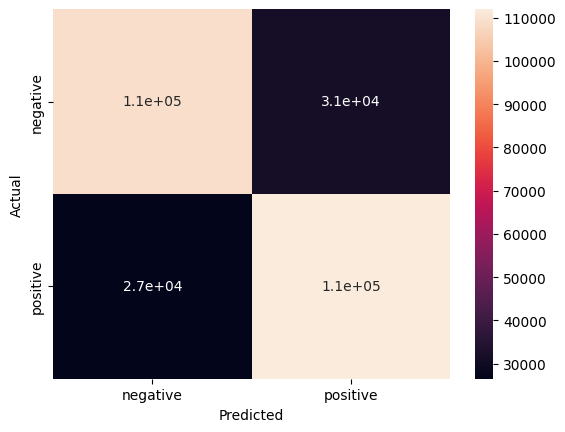

In [41]:
cm = pd.DataFrame(confusion_matrix(y_lin_val, y_lin_pred), index=SENTIMENT_MAP.values(), columns=SENTIMENT_MAP.values())
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
accuracy_score(y_lin_val, y_lin_pred)

0.7929898636539592

In [43]:
# ranfor = RandomForestClassifier(n_estimators=450, random_state=3407)

# ranfor.fit(X_lin_train, y_lin_train)

In [44]:
xgb = XGBClassifier()

xgb.fit(X_lin_train, y_lin_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_lin_pred = xgb.predict(X_lin_val)

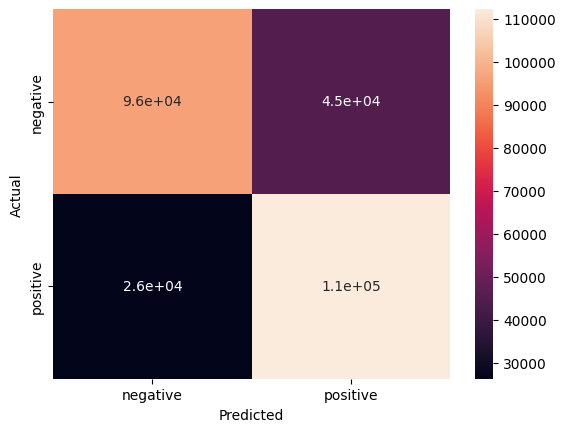

In [46]:
cm = pd.DataFrame(confusion_matrix(y_lin_val, y_lin_pred), index=SENTIMENT_MAP.values(), columns=SENTIMENT_MAP.values())
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
accuracy_score(y_lin_val, y_lin_pred)

0.7462544265867611

## Linear Model

In [32]:
import torch
from torch.utils.data import Dataset, DataLoader

In [33]:
np.random.seed(3407)
torch.manual_seed(3407)
torch_device_seed(3407)

In [34]:
from collections import Counter

In [35]:
selected_column = "Clean_Text"

use glove 6B vocab and 100d embedding

In [36]:
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

glove_file_path = "models/glove.6b.100d.txt"
embeddings_index = load_glove_embeddings(glove_file_path)

len(embeddings_index)

400000

In [47]:
vocab2index = {"": 0, "UNK": 1}
vocab2index.update({vocab: i+2 for i, vocab in enumerate(embeddings_index.keys())})

In [50]:
vocab_size = len(vocab2index)
vocab_size

400002

In [52]:
def encode_sentence(text, max_len=128):
    encoded = np.zeros(max_len, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in text])
    length = min(max_len, len(enc1)) # if above max len, cut the rest
    encoded[:length] = enc1[:length]

    return encoded

In [53]:
df["Clean_Text"].apply(len).describe()

count    1.394976e+06
mean     9.389528e+00
std      4.063388e+00
min      4.000000e+00
25%      6.000000e+00
50%      9.000000e+00
75%      1.200000e+01
max      6.800000e+01
Name: Clean_Text, dtype: float64

In [54]:
MAX_ENCODED_LEN = 70

In [55]:
df["Clean_Text_Encoded"] = df["Clean_Text"].progress_apply(lambda x: np.array(encode_sentence(x, max_len=MAX_ENCODED_LEN)))
df.head()

  0%|          | 0/1394976 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_71363/853000188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text_Encoded"] = df["Clean_Text"].progress_apply(lambda x: np.array(encode_sentence(x, max_len=MAX_ENCODED_LEN)))


,Sentiment,SentimentText,Clean_Text,Clean_Text_detok,Clean_Text_Encoded
1,0,I missed the New Moon trail...,"[I, missed, New, Moon, trailer]",I missed New Moon trailer,"[1, 2134, 1, 1, 8720, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,omg its already 7:30 :O,"[omg, already, 730, O]",omg already 730 O,"[78552, 413, 32286, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[Omgaga, Im, sooo, im, gunna, CRy, Ive, dentis...",Omgaga Im sooo im gunna CRy Ive dentist since ...,"[1, 1, 150972, 14665, 1, 1, 1, 17552, 110, 420..."
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating, TT]",think mi bf cheating TT,"[271, 8433, 34142, 12480, 1, 0, 0, 0, 0, 0, 0,..."
7,0,Sunny Again Work Tomorrow :-| ...,"[Sunny, Again, Work, Tomorrow, TV, Tonight]",Sunny Again Work Tomorrow TV Tonight,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [91]:
X_train, X_val, y_train, y_val = train_test_split(df["Clean_Text_Encoded"], y, random_state=3407, test_size=0.05, stratify=y)

^ This way, no need to embed the text anymore

In [92]:
class TextEmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        self.texts = data.to_numpy() # the assumption is already vocab id
        self.labels = labels.to_list()

    
    def __len__(self):
        return len(self.texts)


    def __getitem__(self, index):
        text = self.texts[index]
        label = torch.tensor(self.labels[index], dtype=torch.float)

        return text, label

In [93]:
train_ds = TextEmotionDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

val_ds = TextEmotionDataset(X_val, y_val)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)

In [94]:
for x in val_loader:
    print(x[0].shape)
    break

torch.Size([32, 70])


In [95]:
embeddings_index["."].shape

(100,)

In [37]:
UNK_VECTOR = np.mean(np.array(list(embeddings_index.values())), axis=0)
UNK_VECTOR.shape

(100,)

In [102]:
pretrained_emb = np.zeros((vocab_size, 100))
# pretrained embedding for padding is 0
# pretrained embedding for unk is UNK_VECTOR
pretrained_emb[1] = UNK_VECTOR

for i, emb_key in tqdm(enumerate(embeddings_index), total=len(embeddings_index)):
    pretrained_emb[i+2] = embeddings_index[emb_key]

pretrained_emb.shape

  0%|          | 0/400000 [00:00<?, ?it/s]

(400002, 100)

In [103]:
pretrained_emb = torch.tensor(pretrained_emb, dtype=torch.float32)

In [104]:
class SimpleLinearModel(nn.Module):
    def __init__(self, vocab_size, input_size, output_size, embedding_matrix=None, freeze_embeddings=True):
        super(SimpleLinearModel, self).__init__()

        self.vocab_size = vocab_size
        self.embedding_dim = 100

        self.embedding = nn.Embedding(vocab_size, embedding_dim=self.embedding_dim)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(embedding_matrix)

        if freeze_embeddings:
            self.embedding.weight.requires_grad = False

        self.linear_size = input_size * self.embedding_dim
        self.linear1 = nn.Linear(self.linear_size, 512)
        self.linear2 = nn.Linear(512, 128)
        self.linear3 = nn.Linear(128, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.linear4 = nn.Linear(64, output_size)


    def forward(self, inputs):
        # we assume the inputs already in embedding dimension
        output = self.embedding(inputs).view(-1, self.linear_size)
        output = F.relu(self.linear1(output))
        output = F.relu(self.linear2(output))
        output = F.relu(self.linear3(output))
        output = self.dropout1(output)
        output = self.linear4(output)

        return output

In [105]:
linear_model = SimpleLinearModel(
    vocab_size=vocab_size,
    input_size=MAX_ENCODED_LEN,
    output_size=1,
    embedding_matrix=pretrained_emb,
    freeze_embeddings=True
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001, weight_decay=1e-5)

In [120]:
linear_model

SimpleLinearModel(
  (embedding): Embedding(400002, 100)
  (linear1): Linear(in_features=7000, out_features=512, bias=True)
  (linear2): Linear(in_features=512, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (linear4): Linear(in_features=64, out_features=1, bias=True)
)

In [106]:
EPOCHS = 8

In [107]:
def fit(model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS):
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        total = 0
        correct = 0
        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
    
            outputs = model(inputs)
            outputs = outputs.squeeze(-1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item() 

            predicted = torch.round(F.sigmoid(outputs))
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        # get train loss and accuracy
        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
    
        # get test loss and accuracy
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            model.eval()
            for data in val_loader:
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                outputs = outputs.squeeze(-1)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                predicted = torch.round(F.sigmoid(outputs))
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch}: train_loss: {train_loss:.4f}; train_accuracy: {train_accuracy:.4f}; val_loss: {val_loss:.4f}; val_accuracy: {val_accuracy:.4f}")

    return {
        "train_loss": train_losses,
        "train_accuracy": train_accuracies,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }

In [108]:
clear_device_cache()

In [109]:
linear_model_result = fit(linear_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.0179; train_accuracy: 0.7009; val_loss: 0.5538; val_accuracy: 0.7150
Epoch 1: train_loss: 0.0172; train_accuracy: 0.7196; val_loss: 0.5489; val_accuracy: 0.7191


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(linear_model_result["train_accuracy"], label="train_accuracy")
plt.plot(linear_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(linear_model_result["train_loss"], label="train_loss")
plt.plot(linear_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
PATH = f"models/torch_text_linear_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(linear_model.state_dict(), PATH)

## Recurrent Model

In [112]:
class RecurrentModel(nn.Module):
    def __init__(self, vocab_size, input_size, output_size, embedding_matrix=None, freeze_embeddings=True):
        super(RecurrentModel, self).__init__()

        self.vocab_size = vocab_size
        self.embedding_dim = 100

        self.embedding = nn.Embedding(vocab_size, embedding_dim=self.embedding_dim)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(embedding_matrix)

        if freeze_embeddings:
            self.embedding.weight.requires_grad = False

        self.lstm1 = nn.LSTM(self.embedding_dim, 256, batch_first=True, num_layers=2, dropout=0.1)

        self.linear1 = nn.Linear(256, 128)
        self.linear2 = nn.Linear(128, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.linear3 = nn.Linear(64, output_size)


    def forward(self, inputs):
        # we assume the inputs already in embedding dimension
        output = self.embedding(inputs)
        _, (hidden, _) = self.lstm1(output)
        output = F.relu(self.linear1(hidden[-1])) # last hidden layer
        output = F.relu(self.linear2(output))
        output = self.dropout1(output)
        output = self.linear3(output)

        return output

In [113]:
rnn_model = RecurrentModel(
    vocab_size=vocab_size,
    input_size=MAX_ENCODED_LEN,
    output_size=1,
    embedding_matrix=pretrained_emb,
    freeze_embeddings=True
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001, weight_decay=1e-5)

In [114]:
rnn_model

RecurrentModel(
  (embedding): Embedding(400002, 100)
  (lstm1): LSTM(100, 256, num_layers=2, batch_first=True, dropout=0.1)
  (linear1): Linear(in_features=256, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (linear3): Linear(in_features=64, out_features=1, bias=True)
)

In [115]:
rnn_model_result = fit(rnn_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS, float_input=False)

Epoch 0: train_loss: 0.0217; train_accuracy: 0.5023; val_loss: 0.6932; val_accuracy: 0.5035


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(rnn_model_result["accuracy"], label="train_accuracy")
plt.plot(rnn_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_model_result["loss"], label="train_loss")
plt.plot(rnn_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
PATH = f"models/torch_text_rnn_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.keras"
print(PATH)

# save model
torch.save(rnn_model.state_dict(), PATH)

## Convolutional Model

In [116]:
for x in train_loader:
    print(x[0].shape)
    break

torch.Size([32, 70])


In [130]:
class ConvolutionalModel(nn.Module):
    def __init__(self, vocab_size, input_size, output_size, embedding_matrix=None, freeze_embeddings=True):
        super(ConvolutionalModel, self).__init__()

        self.vocab_size = vocab_size
        self.embedding_dim = 100

        self.embedding = nn.Embedding(vocab_size, embedding_dim=self.embedding_dim)
        if embedding_matrix is not None:
            self.embedding.weight = nn.Parameter(embedding_matrix)

        if freeze_embeddings:
            self.embedding.weight.requires_grad = False

        self.conv1 = nn.Conv1d(self.embedding_dim, 64, 3)
        self.conv2 = nn.Conv1d(64, 32, 3)
        self.dropout1 = nn.Dropout(0.1)
        self.linear_size = 32 * 66
        self.linear1 = nn.Linear(self.linear_size, 64)
        self.dropout2 = nn.Dropout(0.1)
        self.linear2 = nn.Linear(64, output_size)

    
    def forward(self, input_text):
        embedded = self.embedding(input_text)
        # embedded = [batch size, seq len, embedding dim]
        # need to convert to:
        # embedded = [batch size, embedding dim, seq len]
        embedded = embedded.permute(0, 2, 1)
        output = F.relu(self.conv1(embedded))
        output = F.relu(self.conv2(output))
        output = self.dropout1(output).view(-1, self.linear_size)
        output = F.relu(self.linear1(output))
        output = self.dropout2(output)
        output = self.linear2(output) # no need sigmoid

        return output

In [131]:
cnn_model = ConvolutionalModel(
    vocab_size=vocab_size,
    input_size=MAX_ENCODED_LEN,
    output_size=1,
    embedding_matrix=pretrained_emb,
    freeze_embeddings=True
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-5)

In [132]:
cnn_model

ConvolutionalModel(
  (embedding): Embedding(400002, 100)
  (conv1): Conv1d(100, 64, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(64, 32, kernel_size=(3,), stride=(1,))
  (dropout1): Dropout(p=0.1, inplace=False)
  (linear1): Linear(in_features=2112, out_features=64, bias=True)
  (dropout2): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=64, out_features=1, bias=True)
)

In [133]:
cnn_model_result = fit(cnn_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.0164; train_accuracy: 0.7409; val_loss: 0.5057; val_accuracy: 0.7500
Epoch 1: train_loss: 0.0157; train_accuracy: 0.7547; val_loss: 0.5024; val_accuracy: 0.7550


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(cnn_model_result["train_accuracy"], label="train_accuracy")
plt.plot(cnn_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_model_result["train_loss"], label="train_loss")
plt.plot(cnn_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
PATH = f"models/torch_text_cnn_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(cnn_model.state_dict(), PATH)

## Transformer Model
This time using Keras

In [ ]:
import tensorflow as tf

# check gpu
tf.config.list_physical_devices('GPU')

In [ ]:
tf.__version__

In [ ]:
tf.random.set_seed(3407)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.ffn = Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.dropout2 = layers.Dropout(dropout_rate)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)


    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output) # add + norm
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = x.shape[-1]
        positions = np.arange(0, maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
# onehot y label
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()

In [ ]:
X_train = np.vstack(X_train.to_numpy())
X_train.shape

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
y_train_onehot = onehot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_train_onehot.shape

In [ ]:
X_val = np.vstack(X_val.to_numpy())
X_val.shape

In [ ]:
y_val = y_val.to_numpy()
y_val.shape

In [ ]:
y_val_onehot = onehot.transform(y_val.reshape(-1, 1)).toarray()
y_val_onehot.shape

In [ ]:
embed_dim = 64  # Embedding size for each token
num_heads = 8  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
max_len = 128

inputs = layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(8, activation="relu")(x)
outputs = layers.Dense(len(SENTIMENT_MAP), activation="softmax")(x)

transformer_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
transformer_model.summary()

In [ ]:
transformer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-05),
    # optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# if the loss doesn't decrease, early stop
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2)

history = transformer_model.fit(
    X_train,
    y_train_onehot,
    batch_size=16,
    epochs=20,
    validation_data=(X_val, y_val_onehot),
    callbacks=[callback],
)

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
PATH = f"models/tensorflow_text_transformer_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.keras"
print(PATH)

# save model
transformer_model.save(PATH)

# Predict

In [ ]:
val_data_test = np.random.choice(y_val.index)
test_sample = df.loc[val_data_test]
test_sample

In [ ]:
def predict_torch(model, text, label=None):
    # use torch model
    # convert to vocab id
    print(text)
    text_encoded = encode_sentence(text, vocab2index)
    text_encoded = text_encoded.reshape(-1, text_encoded.shape[0])

    with torch.no_grad():
        model.eval()
        output = model(torch.tensor(text_encoded).to(device))
        _, predicted = torch.max(output.data, axis=1)

        predicted = predicted.cpu().numpy()

    print("Detected Emotion:", emotions_dict[predicted[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [ ]:
predict_torch(linear_model, "I hate this country")

In [ ]:
predict_torch(linear_model, test_sample["Clean_Text_detok"], test_sample["Emotion_uniform"])

In [ ]:
predict_torch(rnn_model, "I hate this country")

In [ ]:
predict_torch(rnn_model, test_sample["Text"], test_sample["Emotion_uniform"])

In [ ]:
predict_torch(cnn_model, "I hate this country")

In [ ]:
predict_torch(cnn_model, test_sample["Text"], test_sample["Emotion_uniform"])

In [ ]:
def predict_tensorflow(model, text, label=None):
    print(text)
    text_encoded = encode_sentence(text, vocab2index)
    text_encoded = text_encoded.reshape(-1, text_encoded.shape[0])

    predicted = model.predict(text_encoded)
    predicted = tf.argmax(predicted, axis=1)

    print("Detected Emotion:", emotions_dict[predicted.numpy()[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [ ]:
predict_tensorflow(transformer_model, "I hate this country")

In [ ]:
predict_tensorflow(transformer_model, test_sample["Text"], test_sample["Emotion_uniform"])

# Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def full_report(labs, pred):
    accuracy = accuracy_score(labs, pred)
    conf_mat = confusion_matrix(labs, pred)
    report = classification_report(labs, pred, target_names=emotions_dict.values())
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    cm = pd.DataFrame(conf_mat, index=emotions_dict.values(), columns=emotions_dict.values())
    sns.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
def pytorch_report(model, val_loader):
    pred = []
    labs = []
    with torch.no_grad():
        model.eval()
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, axis=1)
            labs.extend(labels.cpu().numpy())
            pred.extend(predicted.cpu().numpy())

    full_report(labs, pred)

In [ ]:
def tensorflow_report(model, X_val, y_val):
    pred = model.predict(X_val)
    pred = tf.argmax(pred, axis=1)

    full_report(y_val, pred)

In [ ]:
pytorch_report(linear_model, val_lin_loader)

In [ ]:
pytorch_report(rnn_model, val_loader)

In [ ]:
pytorch_report(cnn_model, val_loader)

In [ ]:
tensorflow_report(transformer_model, X_transformer_val, y_transformer_val)